# Machine Learning: Classification

# Crypto Fraud Detection

 packages:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

In [4]:
#from imblearn.o ver_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 1. Data Importation:

In [9]:
#Import Data
eth_df = pd.read_csv('ethereum_transaction_dataset.csv')

In [11]:
eth_df.shape

(9841, 51)

In [13]:
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [15]:
eth_df.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


# 2. Data Exploration (EDA):

In [18]:
fraud_count = eth_df['FLAG'].value_counts()
print(fraud_count)


FLAG
0    7662
1    2179
Name: count, dtype: int64


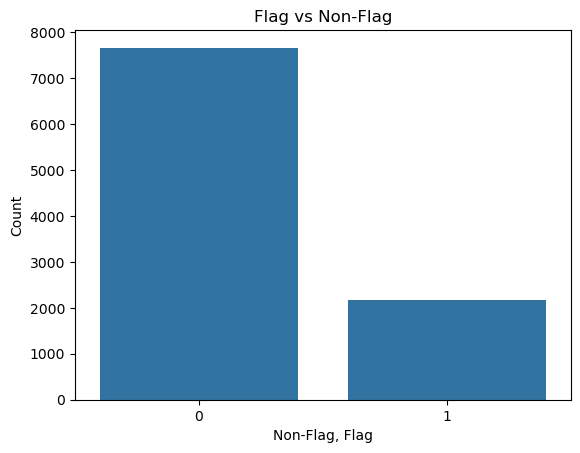

In [20]:
#Plot Flagged vs  Non
sns.countplot(x='FLAG', data=eth_df)
plt.title('Flag vs Non-Flag')
plt.xlabel('Non-Flag, Flag')
plt.ylabel('Count')
plt.show()

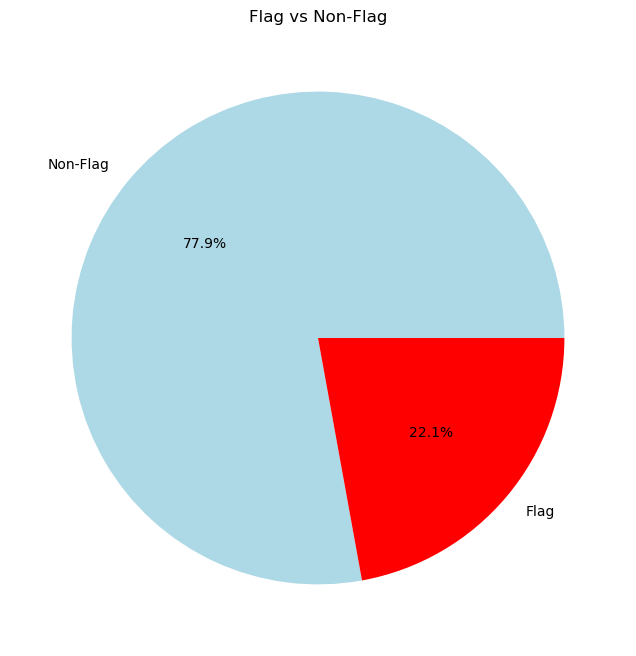

In [22]:

fraud_counts = eth_df['FLAG'].value_counts()

#labels
labels = ['Non-Flag', 'Flag']

#Pilot
plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=labels,autopct = '%1.1f%%', colors=['lightblue', 'red'])
plt.title('Flag vs Non-Flag')
plt.show()

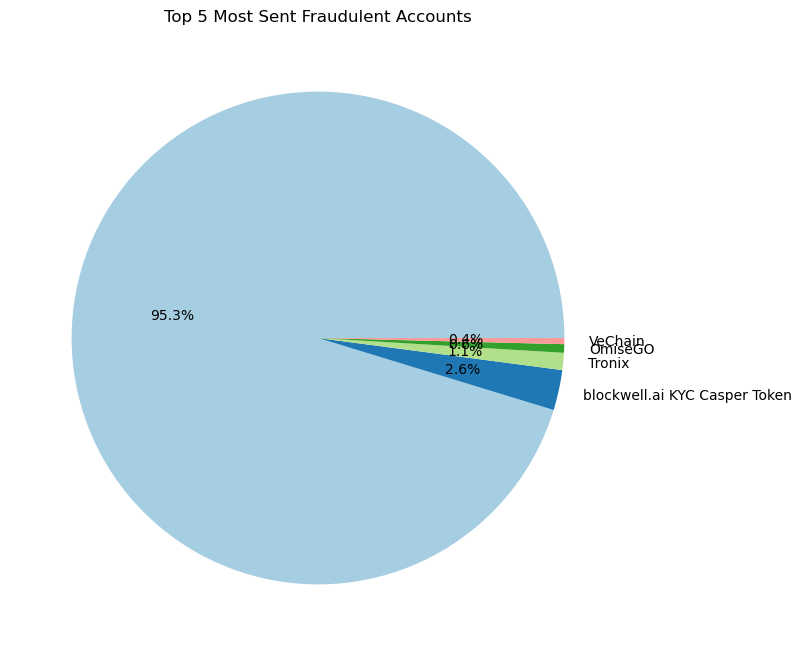

In [45]:

fraud_df = eth_df[eth_df['FLAG'] == 1]

token_counts = fraud_df[' ERC20 most sent token type'].value_counts()

top_5_tokens = token_counts.head(5)

#detailst
labels = top_5_tokens.index
sizes = top_5_tokens.values

#plot
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(labels))))
plt.title('Top 5 Most Sent Fraudulent Accounts')
plt.show()


In [47]:
# Top CTokens sent
token_counts = fraud_df[' ERC20 most sent token type'].value_counts()

top_5_tokens = token_counts.head(5)

#PRING
print("Top 5 Most Sent (Flag):")
print(top_5_tokens)

Top 5 Most Sent (Flag):
 ERC20 most sent token type
                                 1191
blockwell.ai KYC Casper Token      33
Tronix                             14
OmiseGO                             7
VeChain                             5
Name: count, dtype: int64


In [49]:
# Recieved Tokens:
token_counts = fraud_df[' ERC20_most_rec_token_type'].value_counts()

#5 most common tokens
top_5_tokens = token_counts.head(5)

#printingg 5 mostt common
print("Top 5 Most Recieved (Flag):")
print(top_5_tokens)

Top 5 Most Recieved (Flag):
 ERC20_most_rec_token_type
Blockwell say NOTSAFU               779
GSENetwork                           80
Livepeer Token                       46
blockwell.ai KYC Casper Token        39
Free BOB Tokens - BobsRepair.com     37
Name: count, dtype: int64


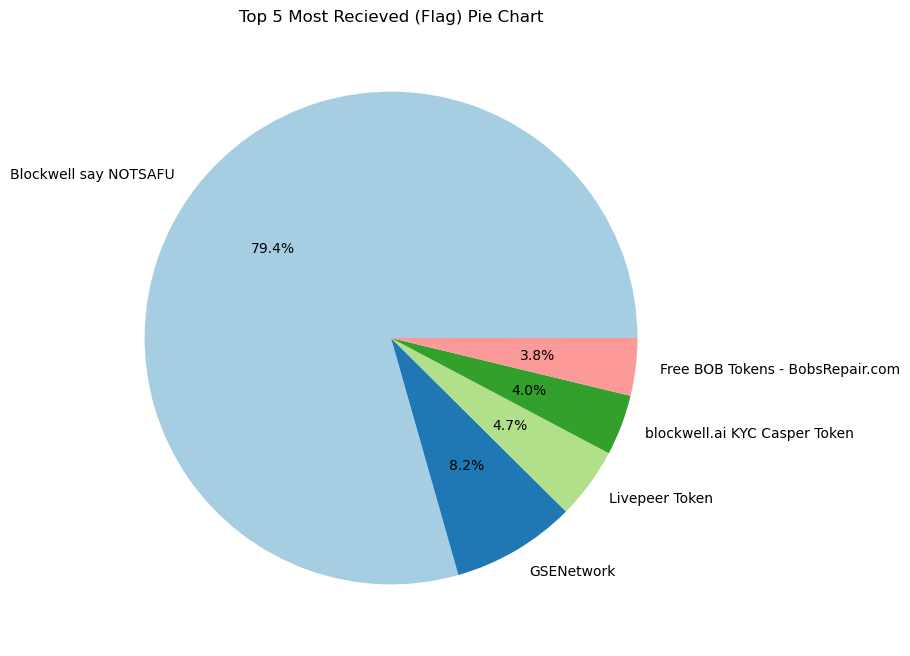

In [51]:
#token_count
token_counts = fraud_df[' ERC20_most_rec_token_type'].value_counts()

#top 5 tokens recieved
top_5_tokens = token_counts.head(5)

#lavels
labels = top_5_tokens.index
sizes = top_5_tokens.values

#plot
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(labels))))
plt.title('Top 5 Most Recieved (Flag) Pie Chart')
plt.show()

In [53]:
aggregated_df = eth_df.groupby('FLAG')[['total Ether sent', 'total ether received']].sum().reset_index()


print("Aggregated Total Ether Sent and Received by Fraud and Non-Fraud Accounts:")
print(aggregated_df)

Aggregated Total Ether Sent and Received by Fraud and Non-Fraud Accounts:
   FLAG  total Ether sent  total ether received
0     0      9.980326e+07          1.143216e+08
1     1      1.903866e+05          2.111336e+05


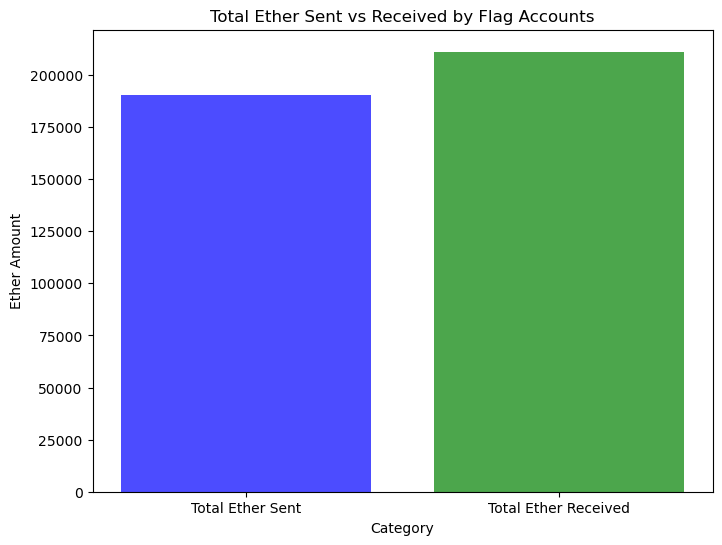

In [55]:
# Filter for fraudulent accounts (FLAG = 1)
fraudulent_df = aggregated_df[aggregated_df['FLAG'] == 1]

# Aggregate the data for fraudulent accounts
fraud_totals = {
    'Total Ether Sent': fraudulent_df['total Ether sent'].sum(),
    'Total Ether Received': fraudulent_df['total ether received'].sum()
}

#get labeling and values for aour plot
labels = list(fraud_totals.keys())
values = list(fraud_totals.values()) #arrange dependendt on variables

plt.figure(figsize=(8, 6))
bar_positions = np.arange(len(labels))

plt.bar(bar_positions, values, color=['blue', 'green'], alpha=0.7)
plt.xticks(bar_positions, labels)
plt.title('Total Ether Sent vs Received by Flag Accounts')
plt.ylabel('Ether Amount')
plt.xlabel('Category')
plt.show()

In [57]:
df_i = fraud_df.loc[:, fraud_df.nunique() > 1]

df_num = df_i[df_i.select_dtypes(include=['float','int']).columns].copy()

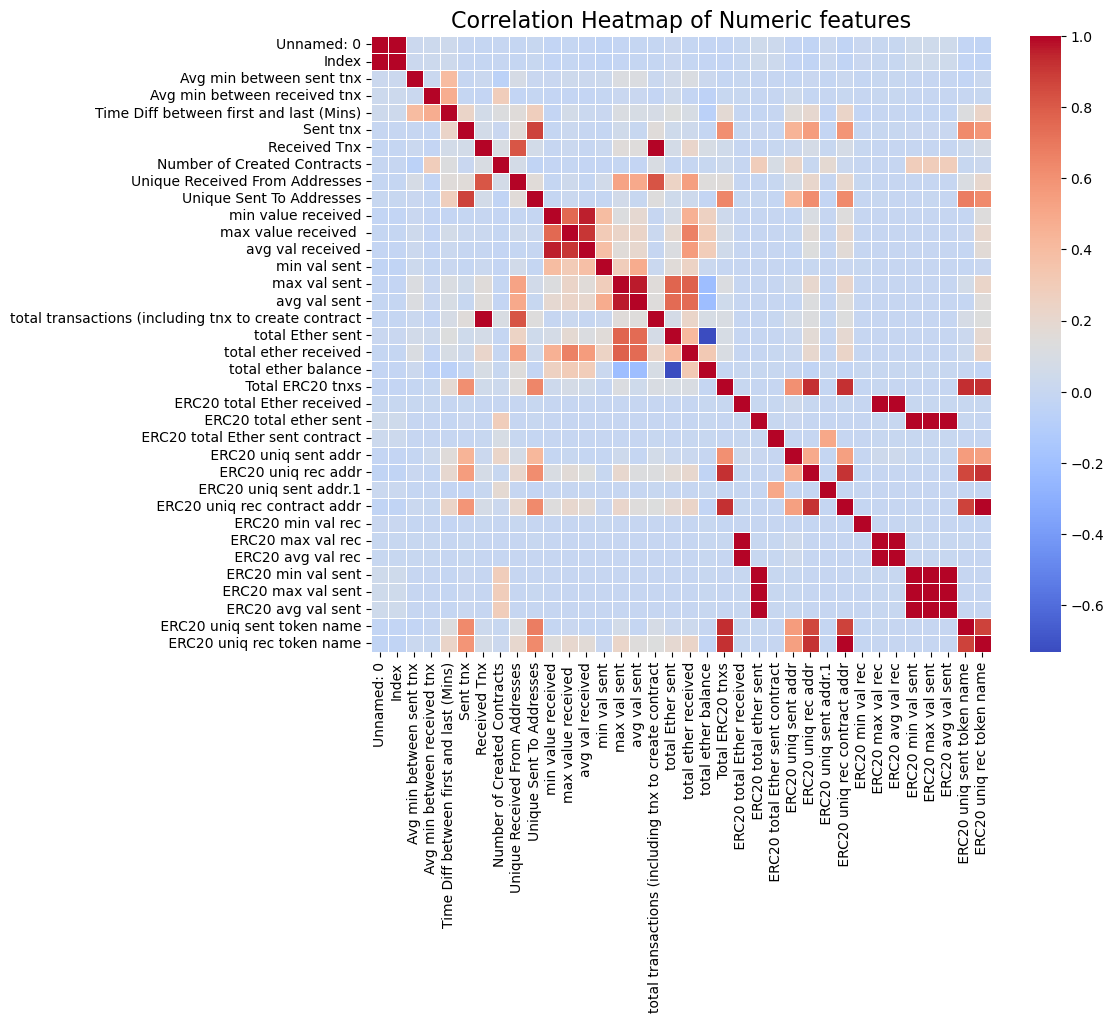

In [59]:
correlation_matrix = df_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric features', fontsize=16)
plt.show()

In [61]:
fraud_df.shape

(2179, 51)

In [63]:
fraud_df.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,2179.000000,2179.000000,2179.0,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,2179.000000,...,1.350000e+03,1.350000e+03,1.350000e+03,1.350000e+03,1.350000e+03,1350.0,1350.0,1350.0,1350.000000,1350.000000
mean,8751.000000,1090.000000,1.0,3888.109780,2874.712639,55230.057953,5.173933,23.775585,0.093162,12.475906,...,1.698577e+07,8.366339e+06,7.540068e+04,8.341266e+07,4.160523e+07,0.0,0.0,0.0,1.533333,4.109630
std,629.167439,629.167439,0.0,17505.367743,10624.453455,107518.118553,21.884569,253.953161,0.356037,69.380810,...,5.730895e+08,2.865383e+08,2.721789e+06,3.048256e+09,1.528143e+09,0.0,0.0,0.0,8.351258,12.696368
min,7662.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,8206.500000,545.500000,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.337000e+00,1.337000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
50%,8751.000000,1090.000000,1.0,0.000000,82.070000,7545.430000,1.000000,3.000000,0.000000,3.000000,...,1.337000e+01,1.337000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,9295.500000,1634.500000,1.0,434.095000,694.700000,48303.700000,2.000000,11.000000,0.000000,9.000000,...,9.900000e+01,2.809250e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,2179.000000,1.0,262976.000000,194451.330000,933778.820000,472.000000,9999.000000,7.000000,2001.000000,...,2.100000e+10,1.050000e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,125.000000,211.000000


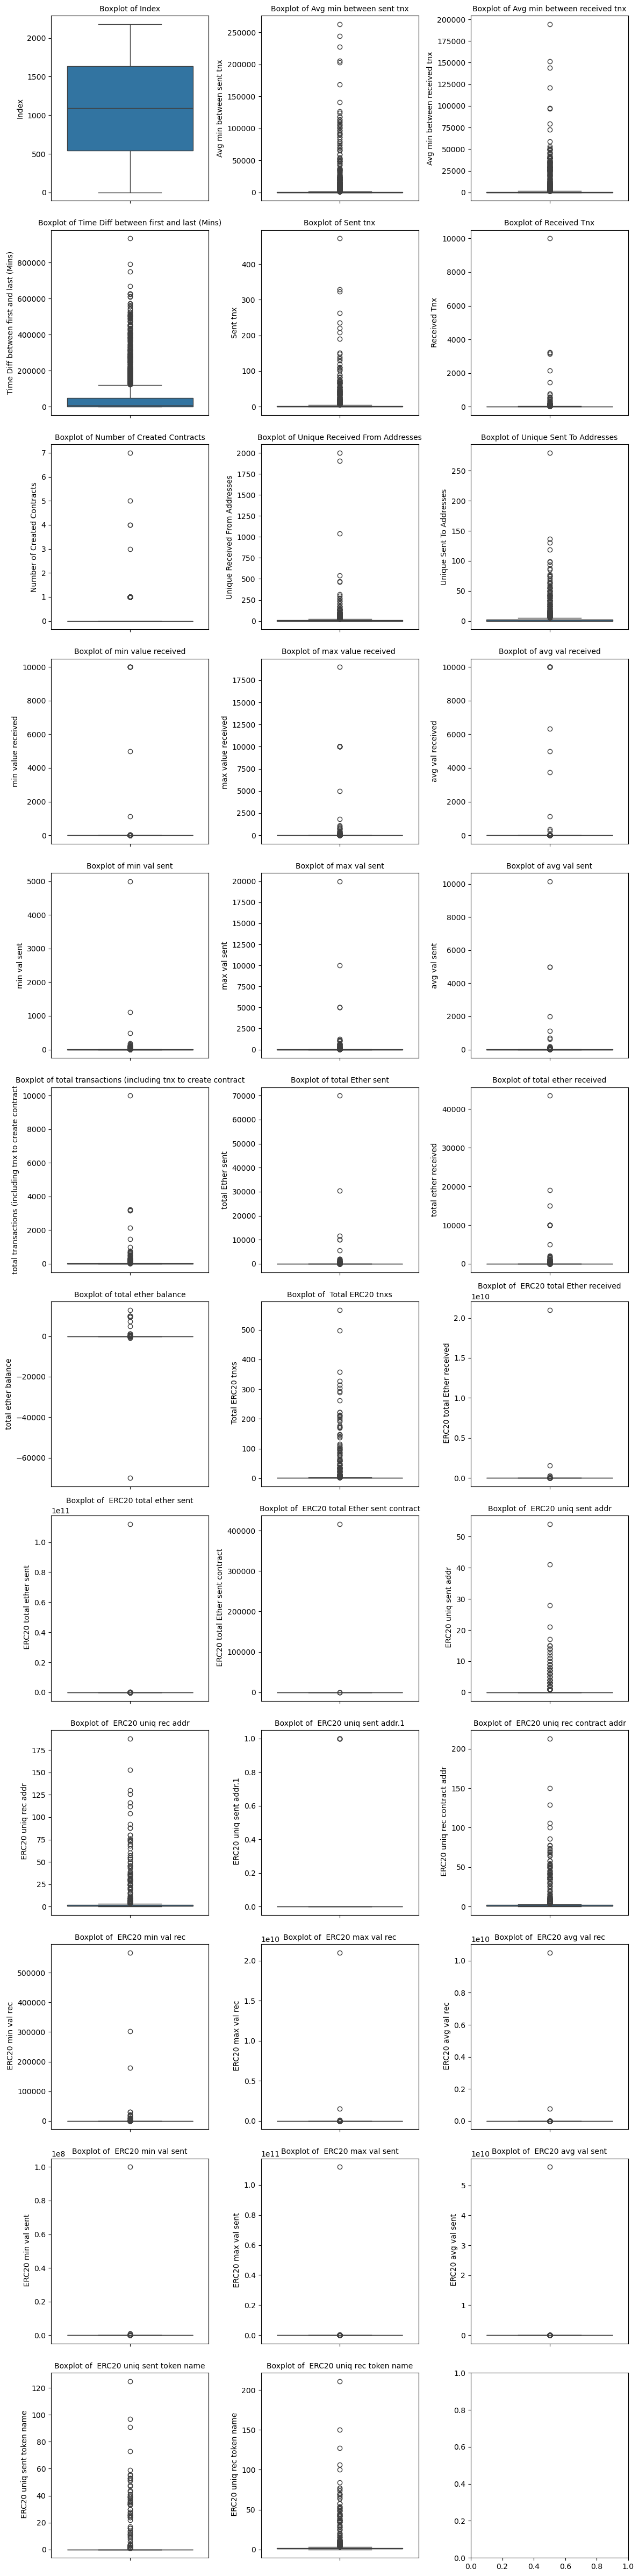

In [65]:
cols = 3
rows = (len(df_num.columns[1:]) // cols) + 1 

# Create the subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(df_num.iloc[:, 1:].columns):
    sns.boxplot(df_num[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=10)
plt.tight_layout()
plt.show()

# 3. Pre-Processing:

In [68]:
#check fmissing
missing_values = eth_df.isnull().sum()

print("Missing values:")
print(missing_values)

#missing values
total_missing = missing_values.sum()
print("Number missing: ", missing_values)

Missing values:
Unnamed: 0                                                 0
Index                                                      0
Address                                                    0
FLAG                                                       0
Avg min between sent tnx                                   0
Avg min between received tnx                               0
Time Diff between first and last (Mins)                    0
Sent tnx                                                   0
Received Tnx                                               0
Number of Created Contracts                                0
Unique Received From Addresses                             0
Unique Sent To Addresses                                   0
min value received                                         0
max value received                                         0
avg val received                                           0
min val sent                                               0
max val 

In [71]:
df2 = eth_df.drop(columns=['Unnamed: 0','Index','Address', ' ERC20_most_rec_token_type', ' ERC20 most sent token type'])

In [73]:
df2.head(3)

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0


In [75]:
df2.shape

(9841, 46)

In [77]:
missing_columns = df2.columns[df2.isnull().any()].tolist()

# Drop columns with missing 
df2_cleaned = df2.drop(columns=missing_columns)

print(df2_cleaned.shape)

(9841, 23)


In [79]:
#check Duplicaes
duplicate_count = df2_cleaned.duplicated().sum()

print("Number of dupes:", duplicate_count)

Number of dupes: 573


In [81]:
df2_cleaned = df2_cleaned.drop_duplicates()

In [83]:
print(df2_cleaned.shape)

(9268, 23)


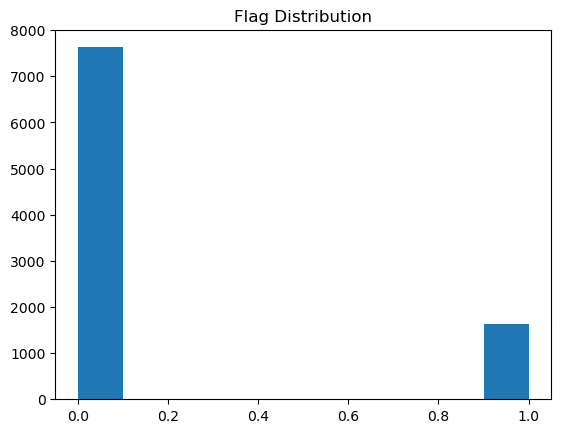

In [85]:
plt.hist(df2_cleaned['FLAG'])
plt.title('Flag Distribution')
plt.show()

In [87]:
X = df2_cleaned.drop(columns = ['FLAG'])
y = df2_cleaned['FLAG']
print(X.shape)
print(y.shape)

(9268, 22)
(9268,)


In [89]:
# Train Test Split:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

print(X_train.shape)
print(X_test.shape)

(7414, 22)
(1854, 22)


In [91]:
columns = ['Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance']

scaler = MinMaxScaler()

# Log for Skewed Data
for c in columns:
  X_train[c] = X_train[c].apply(lambda x: np.log(x) if x > 0 else 0)
  X_test[c] = X_test[c].apply(lambda x: np.log(x) if x > 0 else 0)

# Scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

np.isnan(X_train)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [93]:
print(X_train.shape)
print(X_test.shape)

(7414, 22)
(1854, 22)


# Models:

Logistic Regression, NB Classifier, Random Forest, Gradient Boosting, Ensemble Techniques

# Logistic

- A simple yet powerful algorithm for binary classification.

- Outputs probabilities, making it useful for interpreting results.

- Works well when there is a clear distinction between classes.

Strengths:

- Easy to Interpret
- Good Baseline Model

Weakness:

- Struggles with non-linear patterns in data.

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [102]:
# Create a logistic regression Classifier
log_reg = LogisticRegression()

#Train Model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [104]:
#Make Predictions:
y_pred = log_reg.predict(X_test)

In [106]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8857
Confusion Matrix:
[[1489   37]
 [ 175  153]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1526
           1       0.81      0.47      0.59       328

    accuracy                           0.89      1854
   macro avg       0.85      0.72      0.76      1854
weighted avg       0.88      0.89      0.87      1854



Report:
Class 0 (Non Fraud):

- Precision 0.89 = 89% predicted negatives were actually negative.
- Recall 0.98 = 98% actual negatives were correctly identified.
- F1-score 0.93 = High balance between precision and recall, meaning strong overall performance for this class.
  
Class 1 (Fraud):

- Precision 0.81 = 81% predicted positives were actually positive
- Recall 0.47 = model only correctly identifies 47% of actual positives.
- f1-score 0.59 = lower performance due to imbalance between precision and recall


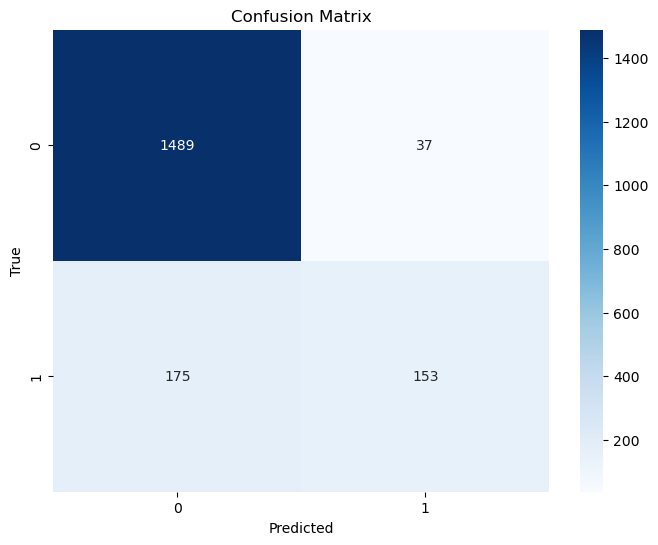

In [108]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Confusion Matrix Breakdown:

- True Positives (153): Correctly predicted positive cases.
- True Negatives (1498): Correctly predicted negative cases.
- False Positives (37): Incorrectly predicted positives (actually negative).
- False Negatives (175): Incorrectly predicted negatives (actually positive).

# Naive Bayes Classifier

- Probabilistic algorithm based on Bayes' Theorem
- Assumes feature indepndence


Advantages:
- Simple & Fast
- Performs Well
- Handles Missing Data

Cons:
- Assumes feature independence
- Performs poorly with highly correlated features
- Struggles with small datasets.

In [115]:
#Package for NB
from sklearn.naive_bayes import GaussianNB

# Set up Naive Bayes classifier
nb_classifier = GaussianNB()

# train with the training data
nb_classifier.fit(X_train, y_train)

# predict using the test data
y_pred_nb = nb_classifier.predict(X_test)

In [117]:
#accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("NB Accuracy: ", accuracy_nb)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))


Decision Tree Accuracy:  0.2011866235167206
Confusion Matrix:
[[  48 1478]
 [   3  325]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.03      0.06      1526
           1       0.18      0.99      0.31       328

    accuracy                           0.20      1854
   macro avg       0.56      0.51      0.18      1854
weighted avg       0.81      0.20      0.10      1854



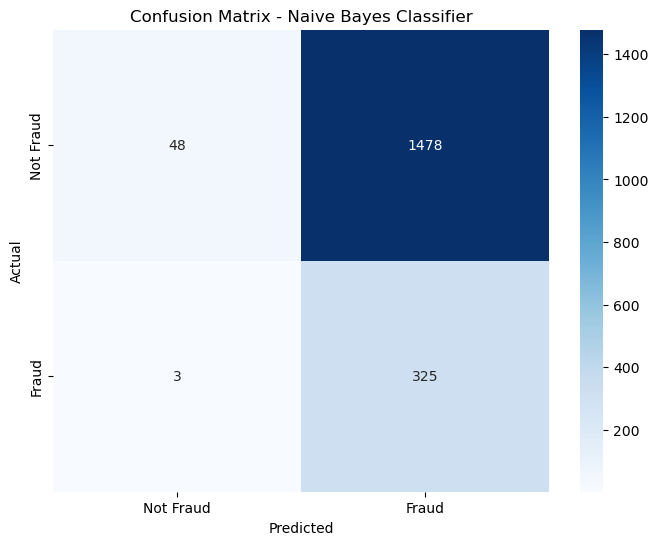

In [119]:
#CM heatmap
conf_matrix = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes Classifier")
plt.show()

### Write your observations about NB Classifier confusion matrix:

# Random Forest:

Main: 
- Ensemble learning method combines multiple Decision Trees
- Bagging (bootstrap Aggregation) to reduce overfitting
- Works well for classification and regression problems
- robust and accurate


How it works:
- Creates multiple decision trees from random subsets of the data.
- Averages predictions (regression) or takes a majority vote (for classification)
- Reduces variance, making it more resistant to overfitting than single decision tree.

Advantages:
- Handle large datasets
- REduce overfitting
- Works with missing data
- feature importance

Weakness:
- Slower for large datasets due to multiple trees
- harder to interpret


In [122]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

In [130]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=["Not Fraud", "Fraud"]))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))





Classification Report:
              precision    recall  f1-score   support

   Not Fraud       0.95      0.98      0.97      1526
       Fraud       0.91      0.75      0.83       328

    accuracy                           0.94      1854
   macro avg       0.93      0.87      0.90      1854
weighted avg       0.94      0.94      0.94      1854

Confusion Matrix:
[[1503   23]
 [  81  247]]


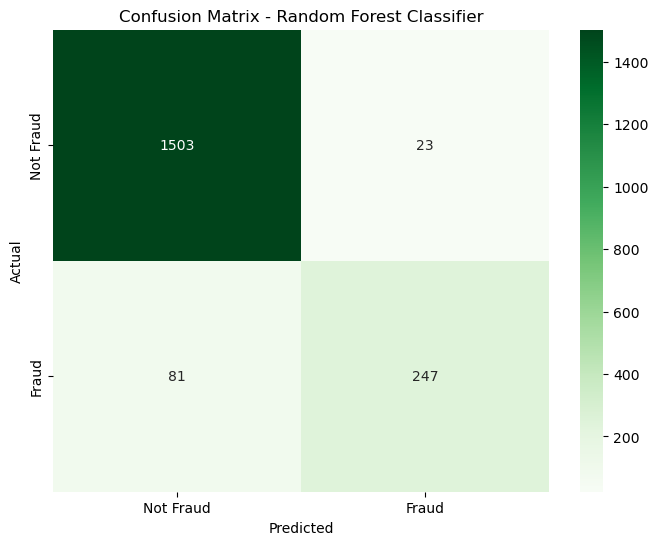

In [132]:
# Plot confusion matrix as a heatmap
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()

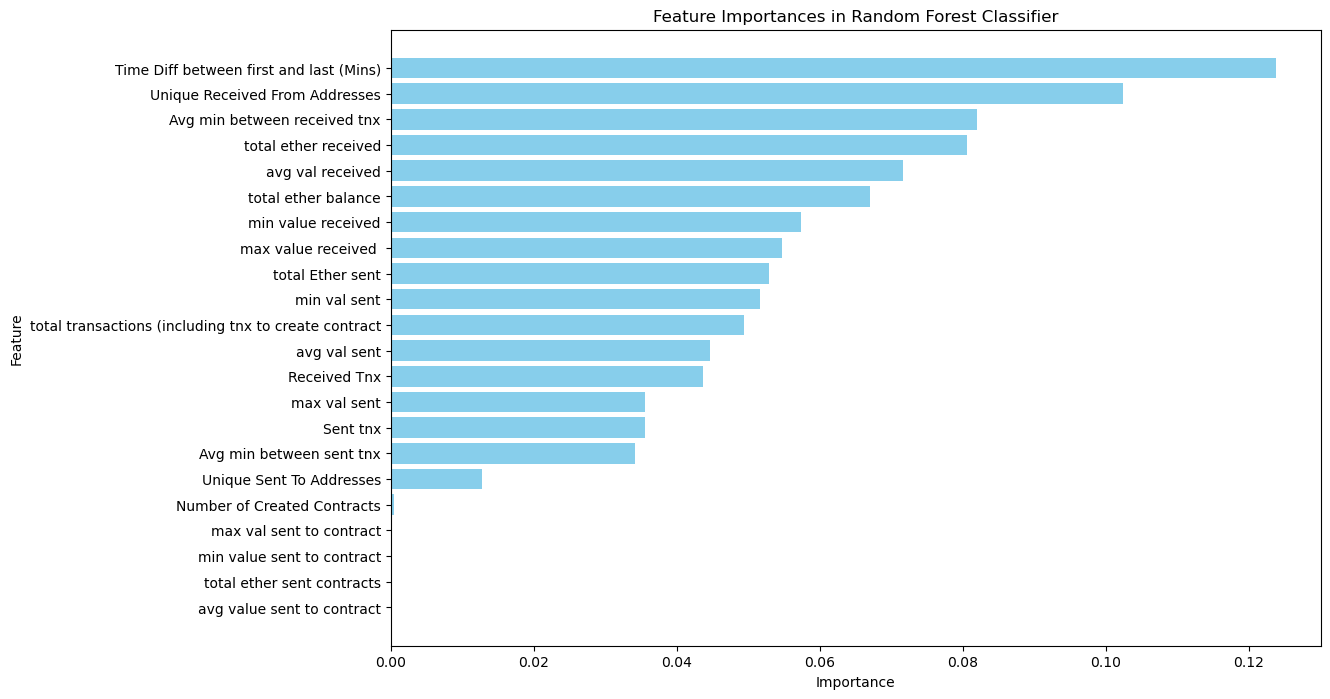

In [136]:
# Extract feature names from the original dataset (replace 'fraud_data' with your actual DataFrame)
feature_names = X.columns if 'X' in locals() else None  # Replace X with the DataFrame you used before splitting

# Get feature importances
importances = rf_classifier.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh([feature_names[i] for i in indices], importances[indices], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in Random Forest Classifier")
plt.gca().invert_yaxis()  # Show the most important feature at the top
plt.show()


### Write your observations about Random Forest Classification Below:

# XGBOOST

Overview:
- is an optimized, high-performance version of gradient boosting.
- Fast and efficient
- works well with structured data

General Process:
- Create mmultiple weak learners
- improve each tree by correcting errors from the previous one
- uses gradient descent to optimize performance
- applies regularization (L1 & L2) to reduce overfitting

Advantages:
- Efficient & Fast
- Handles missing values
- Built in regularization
- Feature importance

Disadvantages:
- More complex
- Can overfit
- Not ideal for small datasets


In [ ]:
#Install if needed:
pip install xgboost


In [ ]:
import xgboost as xgb

In [139]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:38:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [141]:
# Print classification report
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb, target_names=["Not Fraud", "Fraud"]))

# Print confusion matrix
print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))

Classification Report for XGBoost:
              precision    recall  f1-score   support

   Not Fraud       0.96      0.98      0.97      1526
       Fraud       0.90      0.79      0.84       328

    accuracy                           0.95      1854
   macro avg       0.93      0.89      0.91      1854
weighted avg       0.95      0.95      0.95      1854

Confusion Matrix for XGBoost:
[[1498   28]
 [  68  260]]


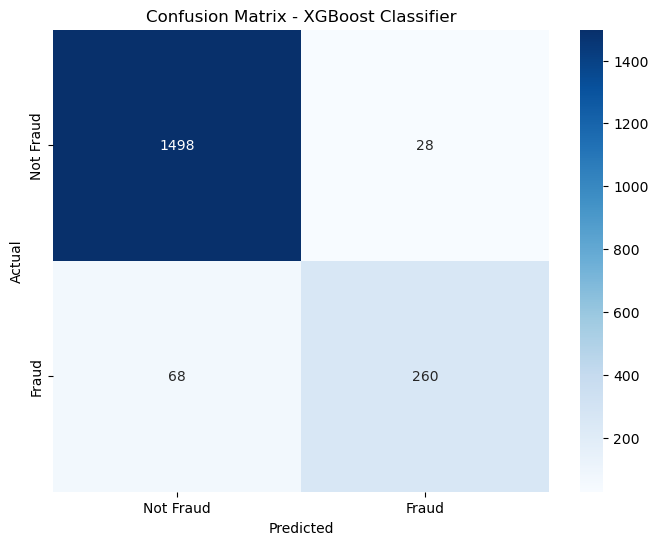

In [143]:
# Plot confusion matrix as a heatmap
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost Classifier")
plt.show()

In [150]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
                           param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use the best estimator for predictions
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:40:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best Cross-Validation Accuracy: 0.9534671395018487


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:40:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [152]:
print(classification_report(y_test, y_pred_best_xgb, target_names=["Not Fraud", "Fraud"]))

              precision    recall  f1-score   support

   Not Fraud       0.96      0.98      0.97      1526
       Fraud       0.89      0.82      0.86       328

    accuracy                           0.95      1854
   macro avg       0.93      0.90      0.91      1854
weighted avg       0.95      0.95      0.95      1854



#### Extra Model to observe Below 

In [154]:
xgb_model = XGBClassifier(
    objective='binary:logistic',
    max_depth=4,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    learning_rate=0.1,
    n_estimators=100,
    seed=42
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9455231930960086
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      1526
           1       0.90      0.78      0.84       328

    accuracy                           0.95      1854
   macro avg       0.93      0.88      0.90      1854
weighted avg       0.94      0.95      0.94      1854

Confusion Matrix:
 [[1497   29]
 [  72  256]]


### Write your observations about XGBoost Below: